# Statistics

In [1]:
from functions.statistics import *

In [2]:
#TODO #values for impaired arm
PATIENT_ID = np.array(['S001', 'S008', 'S009', 'S016']) #np.array(['S001', 'S008', 'S012', 'S009', 'S014', 'S016', 'S015'])
ARAT = np.array([4, 4, 50, 44]) #np.array([4, 4, 57, 50, 56, 44, 34])
FMA_UE = np.array([14, 23, 58, 52]) #np.array([14, 23, 64, 58, 64, 52, 47])
COUNT_THRESHOLD = np.array([199.0, 101.4, 11.2, 23.4])
PITCH_THRESHOLD = np.array([23.8, 15.2, 41.4, 46.8])

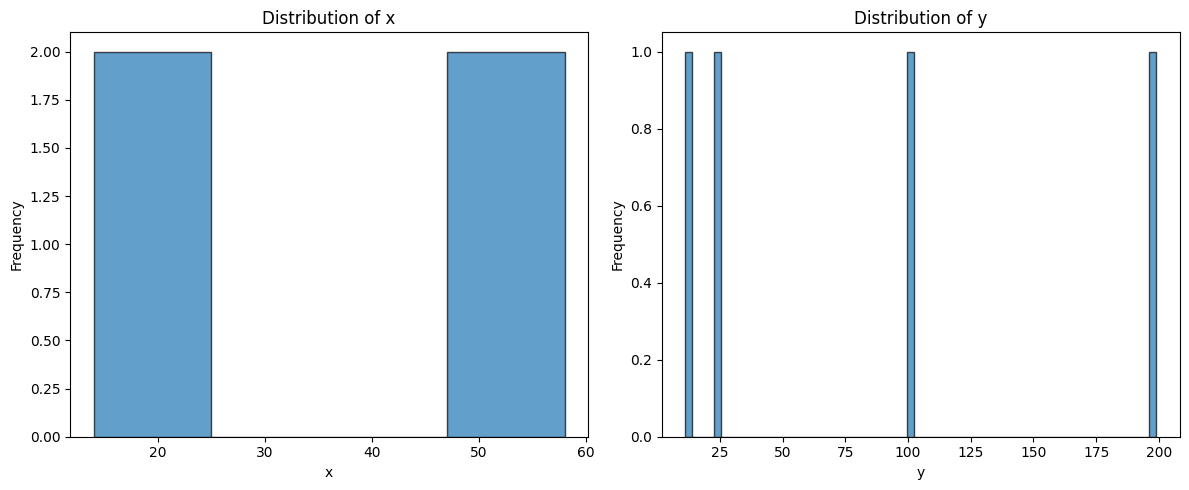

Linear model coefficients: [-3.83005573]
Linear model intercept: 224.50454790580625
Linear Predictions: [182.37393493 178.5438792  174.71382348]
Polynomial Predictions: [225.97791873 214.75338128 203.82692286]
Pearson Correlation: -0.9522284806040038
Spearman Correlation: -1.0


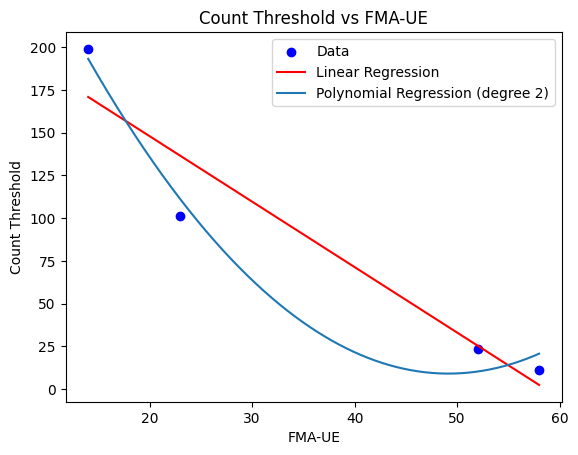

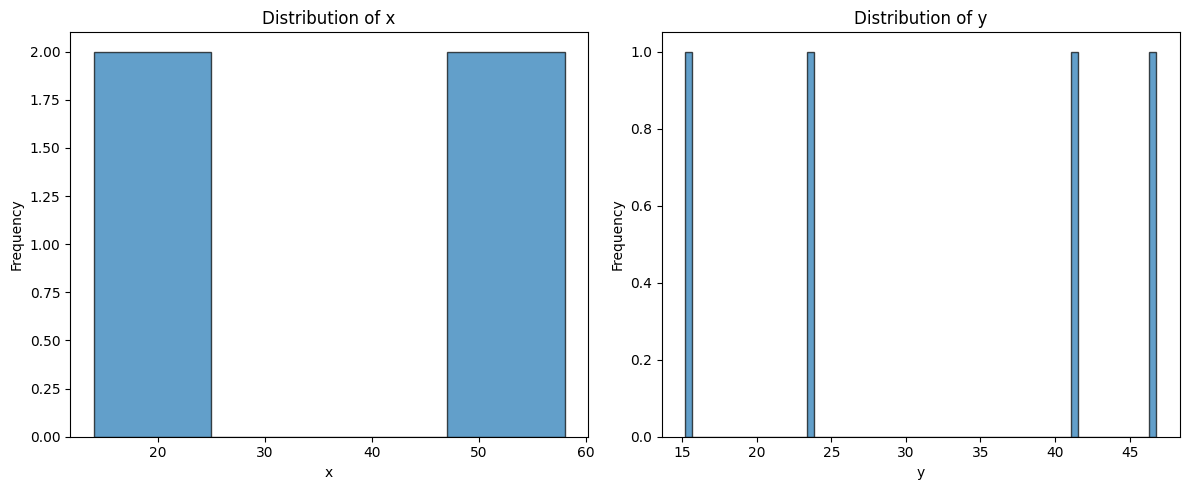

Linear model coefficients: [0.60614776]
Linear model intercept: 9.524069746539634
Linear Predictions: [16.19169513 16.79784289 17.40399065]
Polynomial Predictions: [21.09947072 20.8733446  20.68076828]
Pearson Correlation: 0.882090041342658
Spearman Correlation: 0.6000000000000001


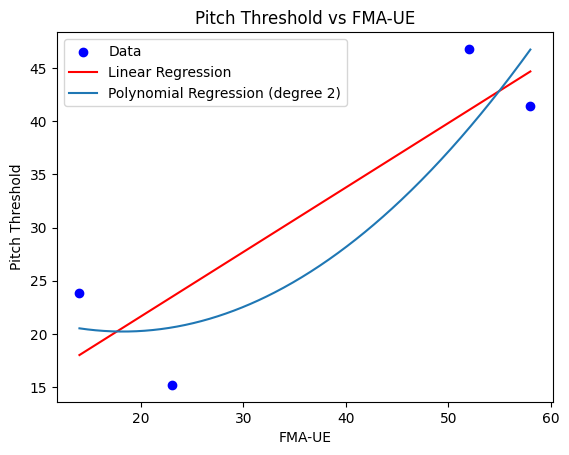

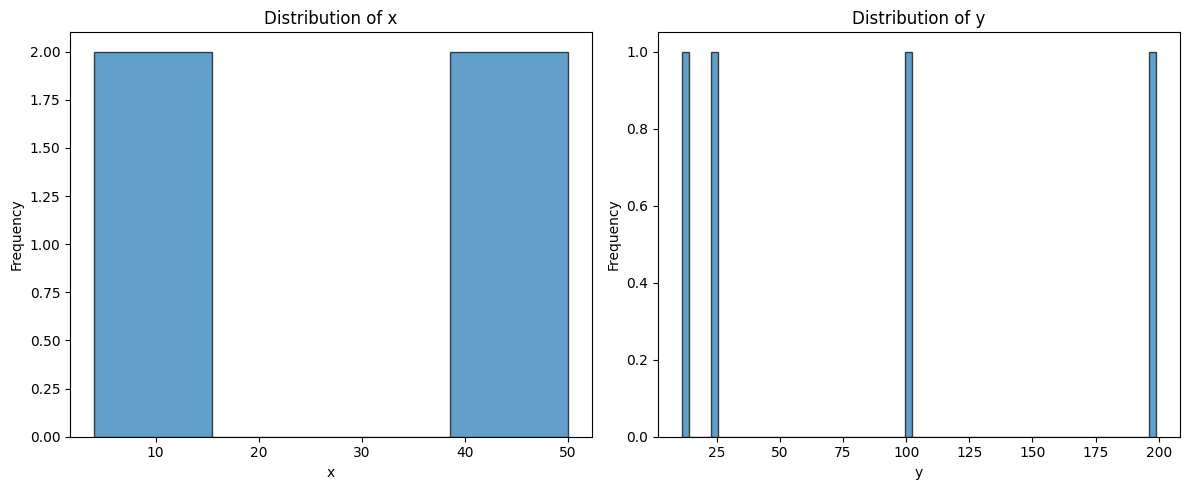

Linear model coefficients: [-3.08050348]
Linear model intercept: 162.3028387787895
Linear Predictions: [128.41730048 125.336797   122.25629352]
Polynomial Predictions: [122.30195652 118.5142029  114.77586957]
Pearson Correlation: -0.8873713497332624
Spearman Correlation: -0.9486832980505139


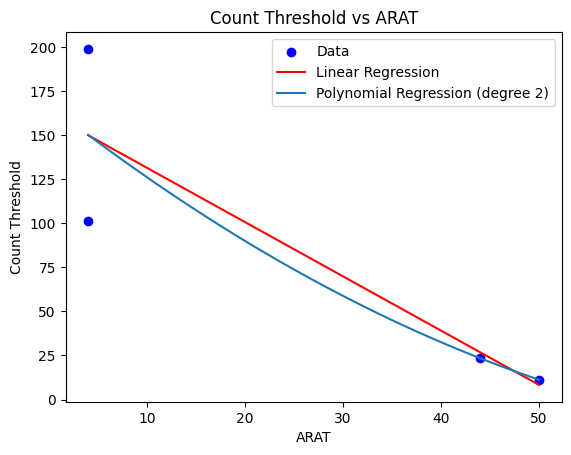

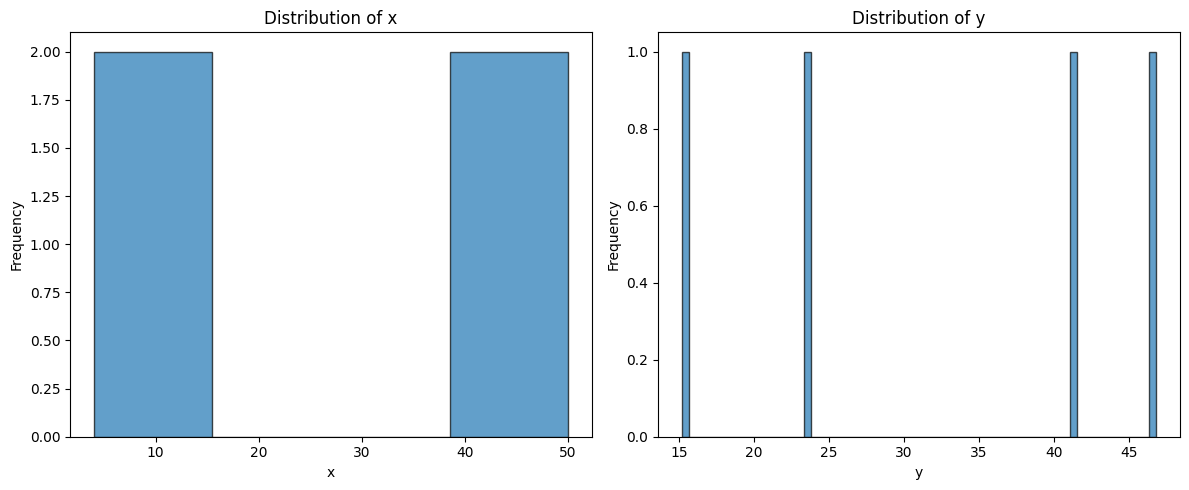

Linear model coefficients: [0.55790037]
Linear model intercept: 17.573540439207285
Linear Predictions: [23.71044456 24.26834494 24.82624531]
Polynomial Predictions: [32.22440217 33.76695652 35.24070652]
Pearson Correlation: 0.9406730264423032
Spearman Correlation: 0.7378647873726218


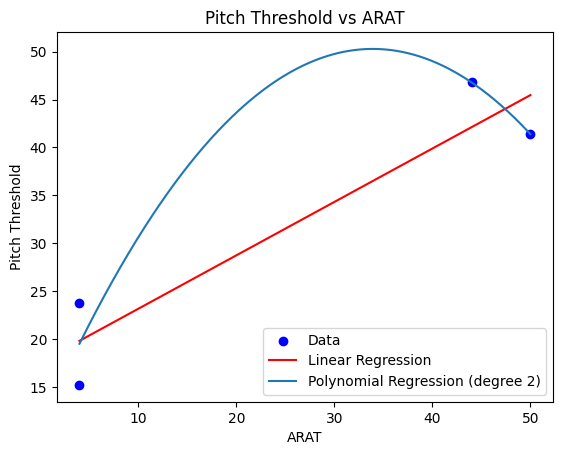

In [4]:
check_regression(FMA_UE, COUNT_THRESHOLD, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE')
check_regression(FMA_UE, PITCH_THRESHOLD, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE')
check_regression(ARAT, COUNT_THRESHOLD, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT')
check_regression(ARAT, PITCH_THRESHOLD, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT')